<a href="https://colab.research.google.com/github/DanielJacksonEdu/GEOG5302M-Programming-for-Data-Science/blob/main/Lab4/GEOG5302M_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Before we start (run me!)
from IPython.display import display, HTML
html_code = """
<div style='text-align: center;'>
    <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/The_SpaceX_Dragon_cargo_craft_approaches_the_space_station_%281%29.jpg/640px-The_SpaceX_Dragon_cargo_craft_approaches_the_space_station_%281%29.jpg' width='600'><br>
    <em>Data can be collected in lots of different ways, including from satellites. <br>
    Source: <a href='https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/The_SpaceX_Dragon_cargo_craft_approaches_the_space_station_%281%29.jpg/640px-The_SpaceX_Dragon_cargo_craft_approaches_the_space_station_%281%29.jpg'</a>NASA, 2010. Public Domain.</em>
"""
display(HTML(html_code))

print("You've just run a hidden code block - how they work is not part of this practical; but you will occationally come across these, e.g. when we are setting up some data in the background for your practical.")


You've just run a hidden code block - how they work is not part of this practical; but you will occationally come across these, e.g. when we are setting up some data in the background for your practical.


Welcome to your 4th week practical for GEOG5302M. Over the past few weeks, we've been introduced to data types, wrangling, and statistical analysis. In this session you'll continue building your skills, introducing regression analysis into the mix, focusing on CO$_{2}$ data related to climate change. We'll explore historical CO$_{2}$ concentration datasets from National Oceanic and Atmospheric Administration's (NOAA) Mauna Loa Observatory which tracks atmospheric CO$_{2}$ over time and the NOAA Laboratory for Satellite Altimetry (LSA) Sea Level Anamoly data, which tracks the difference between the baseline/average sea level and actual sea level.

## Practical contents

1. [Part 1: CO$_{2}$ and the Sea - regression scenario exercise](#part_1)
2. [Homework mini exercises](#homework)
2. [Part 2: Stretch exercises - expanding your regression toolkit](#part_2)
4. [References](#references)

## <a name="part_1"></a>Part 1: CO$_{2}$ and the Sea - regression scenario exercise

 As you work through this notebook, think about how the code could be used for other environments or tasks... the data science MSc's are designed to make you an independent data scientist, with the investigative and critical skills that give you confidence in your abilities to problem. It is very different in this regard to undergraduate level study, where you are more guided. We find this autonomy over your own learning makes this training more fun for you!

Lets getting rolling!



## Data

The NOAA Mauna Loa Monthly CO$_{2}$ Data is a critical dataset for understanding atmospheric carbon dioxide levels and their implications for climate change. This dataset has been extensively analysed* in various studies, providing insights into the dynamics of CO$_{2}$ concentrations and their relationship with environmental factors. You can expore more [here](https://gml.noaa.gov/ccgg/trends/data.html) if interested in where the data comes from.

The NOAA LSA Sea Level Anomaly (SLA) data is a important dataset that measures sea level changes over time. This data is collected from satellite altimeters, which record the height of the sea surface relative to a reference point, providing critical information on both global and regional sea level variations. The data we are using today is part of a larger [Global Mean Sea Level collection](https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/LSA_SLR_timeseries.php) of data.

The beauty of coding your analyses is the greater efficiencies it brings. Today **you** will download real-world **CO$_{2}$ data** and **Sea Level Anamoly** data  collected by NOAA, and build your own regression models to look at whether there is a relationship between atmospheric CO$_{2}$ and sea level.<br>

*E.g. Solomon et al. (2009) used it to addresses the long-term impacts of carbon dioxide emissions on climate change, arguing that certain changes in the climate system may be irreversible, underscoring the urgency of addressing CO$_{2}$ emissions.


In [2]:
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Advanced visualization
import statsmodels.api as sm  # Statistical modeling
from scipy.stats import pearsonr  # Statistical analysis

pd.options.mode.chained_assignment = None  # Suppress chained assignment warnings


While working through this lab, you'll need to make sure your packages are up to date, so that everything runs smoothly. If you get an error saying, for example 'there is no command in seaborn called displot', you can run the code below (remember to remove the `#`!) to update the affected package to the latest version. You'll then need to restart the kernel so the update is ready to go. You can update the package name to the one that you need.

In [ ]:
#pip install --upgrade seaborn

Now load in the data. The `co2_data` data is the `co2-mm-mlo.csv` file. Have you noticed how you haven't loaded in the data yourself today?

Lets look at where the data is being pulled from: `https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv` is the full URL, with the csv file at the end. If your interested in looking in a little more depth, head to the [data page](https://gml.noaa.gov/ccgg/trends/data.html) this is sourced from.

If you were look at the CSV file you'd find lots of meta data at the top, we're interested in the data itself, so lets skip the meta data at the start.

In [3]:
co2_url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv' # If the site breaks, you'll also find the data on Minerva!
co2_data = pd.read_csv(co2_url, skiprows=40)  # Skip the first 40 rows of metadata to read the data

As before, use the `head()` function to inspect the data

In [4]:
#have a look at the top of the data
co2_data.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


Lets now bring in the sea level data.

In [5]:
gmsl_url = 'https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_ref_90.csv' # This defines the URL we will be downloading data from
sea_level_data = pd.read_csv(gmsl_url, skiprows=5)# Skip metadata rows to get to the data

Have a look at what the data looks like, note that we've skipped the metadata again, notice how we had a different amount this. There is no set format of metadata, you need to check each of your datasets independently.

In [6]:
#have a look at the top of the data
sea_level_data.head()


,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF
0,1992.9614,-19.38,NaN,NaN,NaN,NaN
1,1992.9865,-22.64,NaN,NaN,NaN,NaN
2,1993.0123,-24.08,NaN,NaN,NaN,NaN
3,1993.0406,-23.99,NaN,NaN,NaN,NaN
4,1993.0641,-24.27,NaN,NaN,NaN,NaN


Lets simplify the dataset - we know that the different sattelites are present as they cover different dates. Lets take the mean of all the satellite values for each row to give us a single SLA column.

## Data wrangling

###Calculating the mean SLA

Thats suddenly a lot of unknown column names - data often can come with a rich range of data.

The other columns are different satellites. These values are the difference between observed sea level and a long-term mean sea level from different satellites. We call this measurement the Sea Level Anomaly (SLA). The different satellites cover different years. It might look like there is only one value in each column by looking at the top of the data, but there are dates in the dataset where there is cross-over between satellites.

In [7]:
satellite_columns = ['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3', 'Sentinel-6MF'] # List of satellite columns
sea_level_data['sea_level_mean'] = sea_level_data[satellite_columns].mean(axis=1) # Calculate the mean sea level anomaly across satellites

sea_level_data.drop(columns=satellite_columns, inplace=True) # Drop the original satellite columns

Lets look at the data again...

In [8]:
#have a look at the top of the data sea level data again
sea_level_data.head()



,year,sea_level_mean
0,1992.9614,-19.38
1,1992.9865,-22.64
2,1993.0123,-24.08
3,1993.0406,-23.99
4,1993.0641,-24.27


Thats better! Did you spot the line of code we used to remove the original satellite columns after we created the `sea_level_mean` column? Now we have only two columns.

### Joining data

Before we continue, lets join the two data sets. We've got a different range of years in each dataset, but both datasets use the decimal year format for the date. The year is the date in decimal format. It gives the year and the fraction of the year that has passed. For example 1992.96140 is 1992, quite late in the year.

One way we can make the dates more compareable is by combining on year and month. We can do this approximatly by rounding the decimal years to two decimal places. Let start with the CO$_{2}$ data. Note we are overwriting the column for simplicity - usually I would add another column.

In [9]:
co2_data['decimal date'] = co2_data['decimal date'].round(2)

Now the sea level data.

In [10]:
sea_level_data['year'] = sea_level_data['year'].round(2)

We can now join the data as we have a common field. We can do this using the `merge` function in `pandas`. For this analysis we want to remove the rows in either dataset that cannot be matched (e.g. the decimal year is only present in one dataset). We call this an `inner join`.


In [12]:

merged_data = pd.merge(co2_data, sea_level_data, left_on='decimal date', right_on='year', how='inner') # Merging the datasets on the rounded decimal date/year using an inner join
print(merged_data.head()) # Lets look at the data

   year_x  month  decimal date  average  deseasonalized  ndays  sdev   unc  \
0    1992     12       1992.96   355.68          356.50     31  0.32  0.11   
1    1993      1       1993.04   357.10          357.06     28  0.58  0.21   
2    1993      2       1993.12   357.42          356.54     28  0.49  0.18   
3    1993      4       1993.29   359.39          356.71     25  0.53  0.20   
4    1993     11       1993.88   355.53          357.65     29  0.26  0.09   

    year_y  sea_level_mean  
0  1992.96          -19.38  
1  1993.04          -23.99  
2  1993.12          -22.21  
3  1993.29          -20.23  
4  1993.88          -21.31  


Thats data set is starting to look a little messy. This is something you will get used to, variability in names, new variables that you calculate, and the result of joins, will all lead to datasets looking a bit more untidy and/or starting to look confusing.

Lets do a bit of housekeeping to simplyfy the dataset for us to move on to regression.

We'll remove the unnessary variables, and rename the ones that are not clear.

In [13]:
# Select and rename relevant columns
sea_level_co2_data = merged_data[['decimal date', 'average', 'deseasonalized', 'unc', 'sea_level_mean']]
sea_level_co2_data.rename(columns={
    'decimal date': 'year',
    'average': 'co2_ppm',
    'deseasonalized': 'co2_deseasonalized',
    'unc': 'co2_uncertainty',
    'sea_level_mean': 'sea_level_mm'
}, inplace=True)

print(sea_level_co2_data.head())

      year  co2_ppm  co2_deseasonalized  co2_uncertainty  sea_level_mm
0  1992.96   355.68              356.50             0.11        -19.38
1  1993.04   357.10              357.06             0.21        -23.99
2  1993.12   357.42              356.54             0.18        -22.21
3  1993.29   359.39              356.71             0.20        -20.23
4  1993.88   355.53              357.65             0.09        -21.31


### Exploring the variables

Before we can start building a regression model, we start with some statistical inspection. Look back over previous weeks if you need a refresher.

Remember to use the new clean dataset you just put together.

In [15]:
# Find out more about the data types using .info()
sea_level_co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                183 non-null    float64
 1   co2_ppm             183 non-null    float64
 2   co2_deseasonalized  183 non-null    float64
 3   co2_uncertainty     183 non-null    float64
 4   sea_level_mm        183 non-null    float64
dtypes: float64(5)
memory usage: 7.3 KB


In [16]:
# Find out about  numeric variables using .describe()
sea_level_co2_data.describe()

,year,co2_ppm,co2_deseasonalized,co2_uncertainty,sea_level_mm
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2009.974699,390.292732,390.299180,0.210929,30.766721
std,8.996954,19.764597,19.565279,0.091955,28.739858
min,1992.960000,355.530000,356.500000,0.060000,-23.990000
25%,2002.665000,373.475000,373.880000,0.150000,9.485000
50%,2010.460000,389.760000,390.100000,0.200000,25.410000
75%,2017.000000,404.975000,405.770000,0.250000,54.480000
max,2024.620000,426.910000,425.090000,0.580000,85.610000


We will be looking at sea level change and CO$_{2}$ to start with. We'll come to the CO$_{2}$ deasonalised and CO2 uncertainty levels variables later.

For more detail we can look at distributions of our variables of interest. In our regression model, we be predicting the sea level rise, so start by creating a .displot of this variable, using an appropriate number of bins:

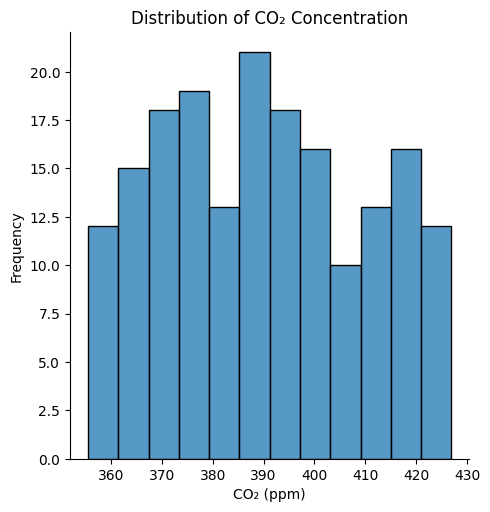

In [26]:
# Create a distribution plot for CO2 concentration
sns.displot(data=sea_level_co2_data, x='co2_ppm', bins=12)
plt.title('Distribution of CO₂ Concentration')
plt.xlabel('CO₂ (ppm)')
plt.ylabel('Frequency')
plt.show()

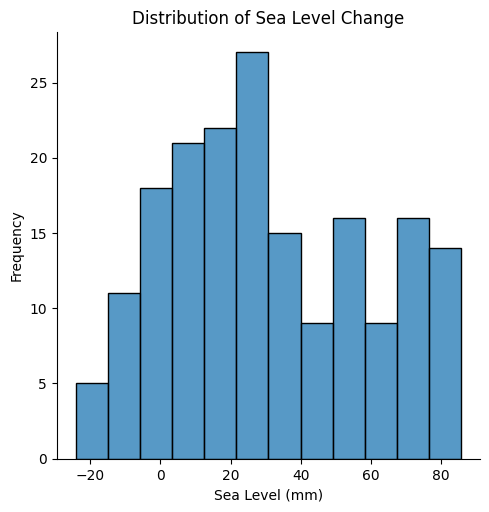

In [27]:
# Create a distribution plot for `sea_level_mm`
sns.displot(data=sea_level_co2_data, x='sea_level_mm', bins=12)
plt.title('Distribution of Sea Level Change')
plt.xlabel('Sea Level (mm)')
plt.ylabel('Frequency')
plt.show()


We can see several peaks in each of the above plots. Try changing the bin values and see what happens. Does it change any patterns you are seeing in the data?

In [24]:
# What could the peak in the data be showing?


#Seasonality, as the data data is collected across years, for multiple years.



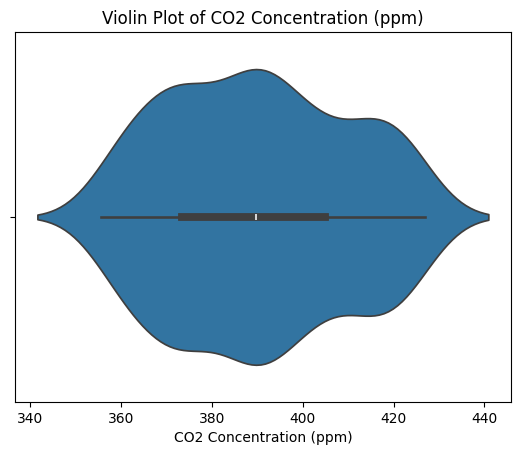

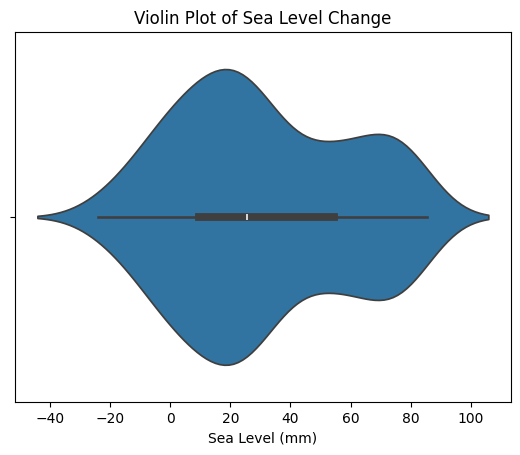

In [25]:
# Create violins plot for CO2 concentration and for sea level change. Remember to include axis labels

# CO2 concentration
sns.violinplot(x='co2_ppm', data=sea_level_co2_data)
plt.title('Violin Plot of CO2 Concentration (ppm)')
plt.xlabel('CO2 Concentration (ppm)')
plt.show()

# Sea level change
sns.violinplot(x='sea_level_mm', data=sea_level_co2_data)
plt.title('Violin Plot of Sea Level Change')
plt.xlabel('Sea Level (mm)')
plt.show()




Lets continue visualise our data to become familiar with it, let make some violin plots.

Compare the histograms to the distribution above. Do they show the same thing? How do they present the information in different ways?

In [ ]:
# Comment on the distributions


# Both histograms and violin plots visualise the distributions of the data, but in different ways.
# Histograms show the frequency of data points within the ranges defined by the bins.
# Violin plots show the probability density of the data, showing the range and shape of the data.



In our regression model, we'll look at the relationship between the sea level anomalies (our y, or _dependent_, variable) from the CO$_{2}$ concentration (our x, or _indepdenent_, variable).

Now we've statistically and visually investigated our variables of interest, we can look at the correlations between them. Create a scatter plot (using `sns.relplot()`)- remember to put _x_ and _y_ the right way round!

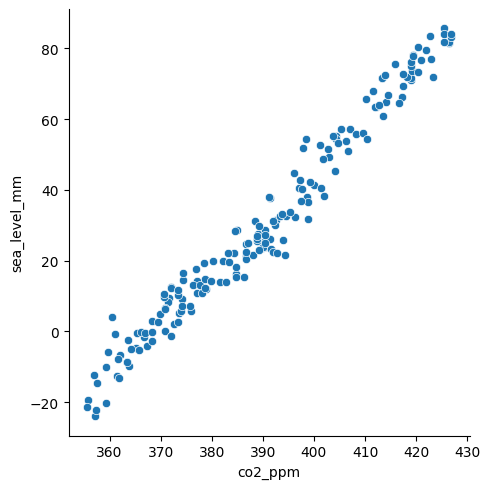

In [30]:
#create a scatter plot where x is Co2_ppm and y is sea_level_mm
sns.relplot(sea_level_co2_data, x='co2_ppm', y= 'sea_level_mm')

We can also calculate the Pearson's _r_ correlation coefficient:

In [31]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(sea_level_co2_data['co2_ppm'], sea_level_co2_data['sea_level_mm'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}') # In scientific notation
print(f'P-value: {p_value:.4e}') # In scientific notation

Pearson correlation coefficient: 0.9848
P-value: 1.2451e-139


What do these values tell us about the direction, strength and significance of the association? Remember, in order for an association to be _statistically significant_, the _p_ - value needs to be less than 0.05.

In [ ]:
# Comment on the pearson r value and p-value
# A Pearson r value of 0.98 indicates an extremely strong positive linear correlation, with the very low p-value (less that 0.05) shows it is statistically significant.
# To put it simply, as CO2 concentration increase, sea level also rises.

The Pearson test indicates a strong linear relationship, a simple linear regression model should be effective in modeling the relationship between CO2 concentration (independent variable) and sea level anomaly (dependent variable).

## Ordinary least squares (OLS) regression

The ordinary least squares (OLS) regression needs certain assumptions that should be met:

*   Linearity. *The Pearson correlation test suggested this assumption is likley to be met and was one of the reasons we moved forwards with the regression.*
*   Homoscedasticity.
*   Normality of residuals.
*   No multicollinearity. *Important for multiple predictors.*
*   No autocorrelation. *Important for time series. You will look at temporal data more closley later in the module.*

### A closer look at the assumptions

### Linearity

A scatter plot of residuals against predicted values can reveal non-linerity, for example if we saw a curve in the residuals.

### Homoscedasticity

This might be a new term for some of you. It is the variance of the residuals (the residuals are the difference between the observed and predicted values) - we need these to be constant for independent variables.

We check for homoscedasticity by plotting the residuals (errors) against the predicted values.

### Normality of residuals

The need to be normally distributed. We check this by plotting a histogram of the residuals. Remember that a normal distribution will give you a bell shaped curve.

### Multicollinearity

Only an issue when you have multiple predictors.

### Autocorrelation

Despite the fact we are using time series data, you focus on temporal data in much more depth later in the module. But we will still check this using a test called the Durbin-Watson Test on the residuals of the regression. You would not do this with simple, single time point data.

For a regression, we will need to run the regression model before we can check these assumptions.

## Lets make our OLS regression model!

*Note: Even though we are primarily focusing on understanding the strength of the relationship between variables here, regression models can also be used to make predictions. In linear regression, once the model is fitted, it can predict the dependent variable based on the independent variables.*

Lets seperate out our independent and dependent variable into clear x and y variables to make the model easier to follow later (the `statsmodels` library we will use in a moment requires x and y to be passed seperatly).

We will also need a constant term (intercept) for the OLS model.

In [32]:
# Define independent and dependent variables
X = sea_level_co2_data['co2_ppm']  # Independent variable (CO2 concentration)
y = sea_level_co2_data['sea_level_mm']  # Dependent variable (Sea level anomaly)

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

Just as when we are plotting, we can choose between (for example) `pyplot` and `seaborn`, there are various methods for modelling in Python. <br>
Some prefer the [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) approach, but we'll be working with the [statsmodels](https://www.statsmodels.org/stable/user-guide.html#background) approach for now, as the output is more intuitive, especially while we're getting to know the process. Feel free to read up on these, and use whichever you prefer (or another alternative, if you can find one) in your own work.

In [33]:
import statsmodels.api as sm #add statsmodels

Now, lets run the OLS regression model itself.


In [34]:
ols_model = sm.OLS(y, X).fit() #OLS regression model.

We'll need to `print` the results to display them.

In [35]:
# OLS regression summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           sea_level_mm   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     5831.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.25e-139
Time:                        09:52:23   Log-Likelihood:                -553.20
No. Observations:                 183   AIC:                             1110.
Df Residuals:                     181   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -528.1532      7.329    -72.068      0.0

## Basic interpretation - OLS regression

**R-squared:** 0.970
This indicates that 97% of the variation in the dependent variable (sea level anomaly) is explained by the independent variable (CO$_{2}$ concentration).

**Adjusted R-squared:** 0.970
What it means: The adjusted R-squared accounts for the number of predictors and sample size. In this case, it is almost the same as the R-squared because we only have one predictor.

**Coefficients**

*    **Constant (const):** -528.15
The intercept, which represents the estimated sea level anomaly when the CO$_{2}$ concentration is zero.

*    **CO2 concentration (co2_ppm):** 1.4321
For each 1 ppm increase in CO$_{2}$ concentration, the sea level anomaly is predicted to rise by 1.43 mm. *This is a key coefficient!*

**Durbin-Watson statistic:** 0.868
Close to 1, which suggests positive autocorrelation in the residuals! This violates the assumption of independent errors and may indicate that the model’s residuals are correlated over time (this is actually expected in time-series data). Other types of advanced regressions might perform better, such as ARIMA or generalized least squares (GLS) that can adjust for autocorrelation.


## Have we failed?

**No.** A failure would have been not checking the assumptions! We have an assumption being violated, so we would not make recommendations from this model. The Durbin-Watson statistic suggests a positive autocorrelation. This is a common issue with time-series data when working with all kinds of environmental data. So what do we do now?

As a data scientist you will regularly come across results which are not perfect - you use the information to choose the best next step. Here, I would usually now use a time series model, which we are not undertaking in this practical. But this highlights a key point; you'll often start with the simplier models such as OLS as an early step, and in many instances it will not be the last model in your workflow.

But its not all bad news. We have a strong model with high R-squared value, which suggests a very strong linear relationship... the majority of the variation in the sea level anomaly is explained by the CO$_{2}$ concentration. Its likley the link between the two variables is valid. This alone would be highly encouraging to moved forwards with time-seres methods.

## Refinement of approach

Lets try a Generalized Least Squares with Autoregressive errors (GLSAR). We won't cover details here, as this is a more specialised model, what we are interested in are the results as we can interpret them similarly to our OLS regression.

In [36]:
# Run a GLSAR model
gls_ar_model = sm.GLSAR(y, X, rho=1)
gls_ar_results = gls_ar_model.iterative_fit()

# Display the GLSAR regression summary
print(gls_ar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:           sea_level_mm   R-squared:                       0.867
Model:                          GLSAR   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1177.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.93e-81
Time:                        09:55:17   Log-Likelihood:                -513.25
No. Observations:                 182   AIC:                             1030.
Df Residuals:                     180   BIC:                             1037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -492.6897     15.310    -32.181      0.0

## Basic interpretation - GLSAR regression

**R-squared:** 0.867

**Coefficients**

*   **Constant (const):** -492.69

*   **CO2 concentration (co2_ppm):** 1.3414

**Durbin-Watson statistic:** 2.093 Close to 2, which indicates autocorrelation is not an issue anymore! The model now satisfies the assumption of independent residuals.

Lets now continue checking the other assumptions. This would have been the same set of plots for the OLS regression.

## Linearity check

The Pearson correlation test and OLS suggested the relational between CO2 concentration and sea level anomaly is linear. We need to check this now with our new model by plotting a scatter plot of observed vs predicted values.

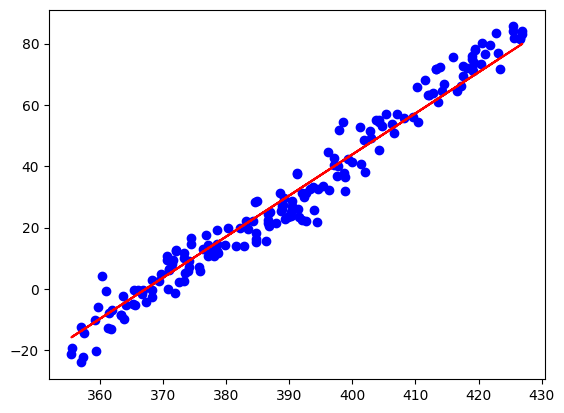

In [37]:
# Predicted values from the GLSAR model
y_pred_glsar = gls_ar_results.predict(X)

# Scatter plot of observed vs predicted values
plt.scatter(sea_level_co2_data['co2_ppm'], sea_level_co2_data['sea_level_mm'], label='Observed', color='blue')
plt.plot(sea_level_co2_data['co2_ppm'], y_pred_glsar, label='Fitted line (GLSAR)', color='red')
# add the remaining rows to complete this block

This is look very good. The scatter plot of observed values (blue dots) vs. predicted values (red line) shows a clear linear relationship. The points cluster closely around the fitted line, indicating that the model fits the data well. This suggests the linearity assumption is satisfied, as the relationship between CO$_{2}$ concentration and sea level anomaly is indeed linear.

## Homoscedasticity check

We need to plot the residuals against the predicted values from the model.




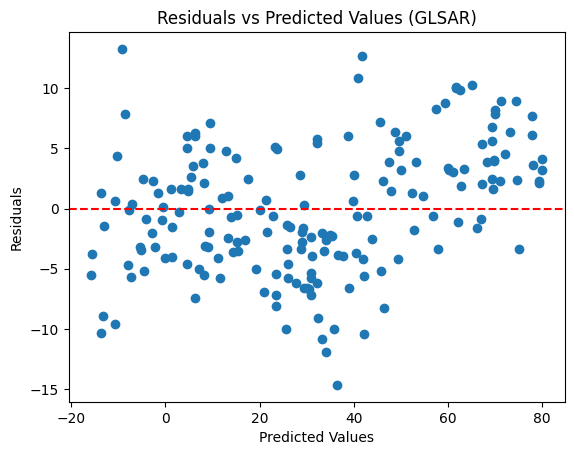

In [41]:
# Residuals from GLSAR model
residuals_glsar = sea_level_co2_data['sea_level_mm'] - y_pred_glsar

# Residuals vs predicted values
plt.scatter(y_pred_glsar, residuals_glsar)
plt.axhline(0, color='r', linestyle='--') # Make the line red
plt.title('Residuals vs Predicted Values (GLSAR)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Excellent! This random scatter of points suggests there is no clear pattern in the residuals. Essentially, the redisuals are behaving as expected and we not seeing signs of heteroscedasticity.

*Note: if we saw a funnel shape, or other trend in the residuals, then we would be seeing signs of heteroscedasticity.*

## Normality of residuals

We'll first plot a histogram of the residuals. We are looking for a normal distribution.

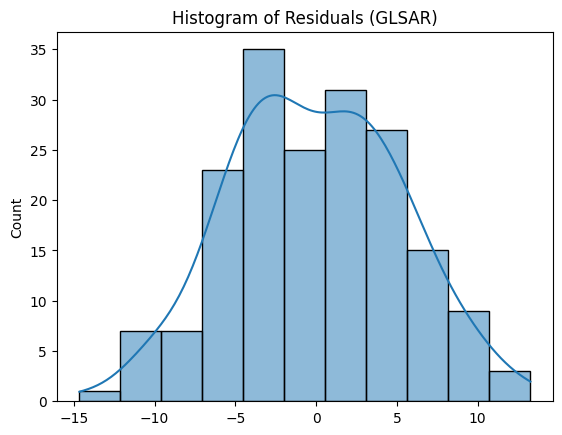

In [42]:
# Histogram of residuals
sns.histplot(residuals_glsar, kde=True)
plt.title('Histogram of Residuals (GLSAR)')
plt.show()

The distribution looks roughly bell-shaped, which is a good indication that the residuals are fairly normally distributed.There is a minor skew, not extreme, but it's worth noting.

The second plot we need to check for normality of residuals is the Q-Q plot. A Q-Q plot compares the quantiles of your residuals to the quantiles of a normal distribution. If the residuals are normally distributed, the points should fall roughly along the 45-degree line.

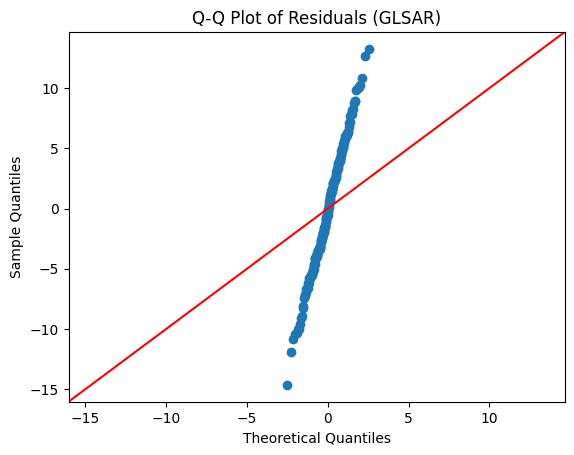

In [44]:
# Q-Q plot
sm.qqplot(residuals_glsar, line='45') # We can manually define the slop of the line, lets try 45 degrees
plt.title('Q-Q Plot of Residuals (GLSAR)')
plt.show()

Are we seeing the residuals fall along the 45-degree line?



In [ ]:
# Are the residuals falling along the 45-degree line?
# The residuals deviate from the line at the extremes, suggesting slight departures from normality.

Following the above results, we would need to continue exploring different models or transform the data. We will leave this analysis here, but rest assured the relatioship between sea level change and CO$_{2}$ concentrations in the context of climate is well documented, e.g. Ran et al. (2003) and Ekwurzel (2017).

Well done on completing this part of the practical, you've now practiced the basics of a OLS regression analysis, but also reinforced the nature of conducting analysis, be it in assignments, your final data science 60 credit project, or beyond in your careers. We must pay attention to the results of our models and refine our approaches depending on what they tell us.

Through this process, we have gone through most of the assumptions and have learnt what to look for. We didnt get to multicollinearity, but don't worry, we introduce you to that in Part 2!






## <a name="part_2"></a>Part 2: Strech exercises - expanding your regression toolkit

In part 2 we take a different approach, and practice a bit more, this time with multiple independent variables, multicollinearity, categorial variables, logistic regression, and support vector machines.

**Start by running the following code block**, it sets up the data so we can progress quickly. You may expand the code and have a look if interested, though it is not part of this practical.

In [46]:
#@title Part 2 setup

# Part 2 setup code (hidden for brevity)
# This code imports necessary libraries and prepares the airquality dataset for analysis.

# Import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

data = sm.datasets.get_rdataset("airquality", "datasets")
airquality = data.data.dropna()

print("Data setup successfully completed. Please continue.")


Data setup successfully completed. Please continue.


## Data

We'll use an adapted version of the `airquality` dataset from the `statsmodels` library. Part 2 is very much about now giving you some extra tools to use in your analyses, and takes a different format for Part 1, which was more scenario based.

Lets have a quick look at the data. It has been loaded into your workspace through the above setup code already.

Note: the dataset is called `airquality`!


In [47]:
# Display the top of the data using .head
print(airquality.head())

# Display summary information using .head
print(airquality.info())


   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
6   23.0    299.0   8.6    65      5    7
<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 KB
None


## Multiple OLS regression

Regression can can multiple predictors. This opens the door to more complex analyses. Let’s use multiple linear regression to predict the continuous Ozone levels using Solar.R, Wind, and Temp as independent variables. This will allow you to explore how multiple atmospheric factors contribute to ozone pollution.

In [52]:
# Multiple regression to predict Ozone levels
X_reg = airquality[['Solar.R', 'Wind', 'Temp']] #independent variables
y_reg = airquality['Ozone'] #dependent variable

X_reg = sm.add_constant(X_reg)  # Add a constant for intercept
mult_reg_model = sm.OLS(y_reg, X_reg).fit()

# Print model summary
print(mult_reg_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.51e-21
Time:                        10:18:36   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -64.3421     23.055     -2.791      0.0

## Multicollinearity Using VIF

As we didnt get the opportunity to check for multicollinearity in the Part 1, lets start with it. The Variance Inflation Factor (VIF) helps quantify how much multicollinearity exists between the independent variables. A high VIF (generally above 10) suggests multicollinearity.

Here’s the code to calculate the VIF for each variable:

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Prepare the independent variables for VIF calculation (including the constant)
X_vif = airquality[['Solar.R', 'Wind', 'Temp']]
X_vif = sm.add_constant(X_vif)  # Adds the constant for the intercept

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


  Variable         VIF
0    const  131.510413
1  Solar.R    1.095253
2     Wind    1.329070
3     Temp    1.431367


The Variance Inflation Factor (VIF) values you obtained for the GLSAR model suggest that multicollinearity is not a significant issue in our data.

You may be surprised considering the high VIF in the output above. Why do you think its OK for this value to be above 10 (not this is an exception).

In [ ]:
#Why is it OK that the high VIF value is OK for this particular variable?
#The high VIF for the constant is expected and does not affect multicollinearity between the independent variables.
#Some data scientists would just not include the constant in the VIF check in the first place!

# Checking further assumptions

We've just checked for multicollinearity, but there are other checks that would need to be done, in the same way as we did earlier.

*   Linearity
*   Homoscedasticity.
*   Normality of residuals.
*   No autocorrelation.

Can you write the code for a plot so we can look at Homoscedasticity?

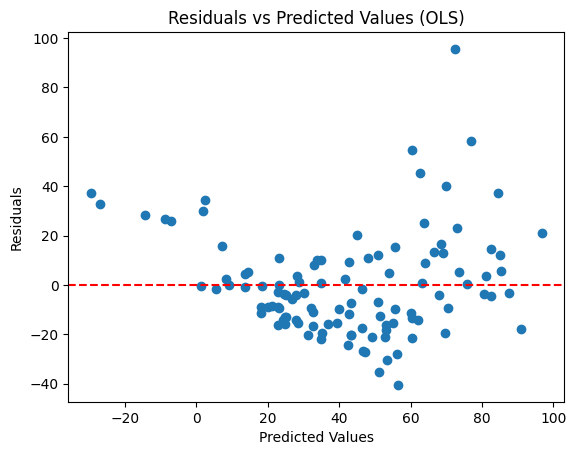

In [54]:
# Predicted values from the OLS model
y_pred_ols = mult_reg_model.predict(X_reg)

# Residuals from OLS model
residuals_ols = y_reg - y_pred_ols

# Residuals vs predicted values
plt.scatter(y_pred_ols, residuals_ols)
plt.axhline(0, color='r', linestyle='--') # Make the line red
plt.title('Residuals vs Predicted Values (OLS)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# What is your plot showing? Is there homoscedasticity?
# Yes! We can see the classic 'funnel' shape in scatter plot.
# The residuals plot you’ve created seems to suggest heteroscedasticity (non-constant variance of the residuals)
# It is indicating the model might violate the assumption of homoscedasticity.
# What would you do next?

## Binary classification of ozone levels

Before we move on, we need some binary data! Binary categorisation of data is incredibly useful if we are wanting to undertake an analysis that focuses on clear, decision-based outcomes. By transforming continuous variables into binary categories, such as high vs. low or yes vs. no, we simplify the data into manageable classes that can be used in classification models, such as logistic regression or support vector machines.

Lets build a new binary variable based on the continuous Ozone levels in the air - based on whether they are high (above 100) or low (100 or below) using `numpy`s `.where` function. Notice in the code below how we give the threshold which defines whether it will be classed as a `1` or `0` (i.e. a binary split). Our case we use 100.

In [73]:
airquality['Ozone_Level'] = np.where(airquality['Ozone'] > 100, 1, 0)  # Binary variable: 1 = High Pollution, 0 = Low Pollution

# Logistic Regression

Logistic regression is particularly useful when we are dealing with binary classification problems, where the outcome variable is categorical and has only two possible values. In our case, we’ve created a new binary variable, Ozone_Level, which indicates whether the Ozone concentration is above or below 100 (1 for high, 0 for low).

Unlike ordinary linear regression, which predicts a continuous outcome, logistic regression estimates the probability that a certain instance belongs to one of the two categories.

Let's run a logistic regression to predict whether the Ozone Level is high (1) or low (0), using the features Solar Radiation, Wind, and Temperature.

This time we are going to use a different library, the popular `scikit-learn`.

To start with, lets create the training and testing sets for the dependent and independent variables. If you have not come across these sets yet, heres a quick overview:

**Training set:** This is the portion of the data used to "train" the logistic regression model. The model will learn the patterns from this data.

**Testing set:** This is the portion of the data used to evaluate the model’s performance. It ensures the model can generalize well to unseen data.

In the code below we set this as `0.2` which means 20% of the data is used for training the logistic regression model, and the remaining 80% is used to test (i.e. 'evaluate') the models performance. The `random_state` ensures reproducibility of the split. By setting a specific number (42 in this case), the function will always split the data in the same way every time it is run. This is important when you want consistent results across different runs of the code.

In [74]:
X = airquality[['Solar.R', 'Wind', 'Temp']]  # Independent variables
y = airquality['Ozone_Level']  # Dependent variable (binary target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardising the features is common with the use of SVR, but for the purposes of this practical we will skip this.

In [75]:
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model with the training data
log_reg.fit(X, y)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)

Great, you've ran the model! But how do we look at the results?

We'll call two very useful tables; the confusion matrix and the classification report. Lets run the code first and then interpret them.

In [76]:
# Lets evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Confusion Matrix:
[[20  1]
 [ 1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.50      0.50      0.50         2

    accuracy                           0.91        23
   macro avg       0.73      0.73      0.73        23
weighted avg       0.91      0.91      0.91        23



Thats a lot of values... lets break this down. We focus on the confusion matrix, the first smaller table. But I want you to be aware of the classification report.

**Confusion matrix**

This shows how well a classification model is performing by comparing the actual labels with the predicted labels - we use this as a measure of accuracy.

*   True Negatives (TN) (Top Left): Cases where the model correctly predicted the negative class (e.g., low ozone predicted as low ozone).

*   False Positives (FP) (Top Right): Cases where the model incorrectly predicted the positive class (e.g., low ozone predicted as high ozone).

*   False Negatives (FN) (Bottom Left): Cases where the model incorrectly predicted the negative class (e.g., high ozone predicted as low ozone).

*   True Positives (TP) (Bottom Right): Cases where the model correctly predicted the positive class (e.g., high ozone predicted as high ozone).

So what does this tell us about our model?

**Classification report**

There is a lot of information here, gives more detailed information than a confusion matrix. While the confusion matrix shows how many predictions were correct or incorrect, the classification report tells you how well the model performs for each class (like low ozone vs high ozone) by giving three key metrics:precision, recall, and f-score. If you want to explore this further see the [official guidance](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html), but I recommendment you [first read this gentler introduction](https://www.jcchouinard.com/classification-report-in-scikit-learn/).


In [ ]:
# What does the confusion matrix tell us about how the model is performing?
# It is very good at predicting low ozone levels (class 0) with 21 correct predictions out of 21.
# But, the model struggles with identifying high ozone levels (class 1), only catching 1 out of 2 cases. It also missed 1 high ozone case, which was incorrectly predicted as low.
# The model is biased towards predicting the majority class (low ozone), this might be due to the dataset being imbalanced, but we don't cover that here.

## Support Vector Regression (SVR)

Support Vector Regression (SVR) is used for continuous data regression tasks (you may have come across Support Vector Machines, or SVM, that are popular for binary classification tasks). SVR works by finding the best line (or curve) that fits the data points as closely as possible, while also minimizing error.

We'll predict the continuous variable Ozone using the features Solar.R, Wind, and Temp from the `airquality` dataset.

*Lets load in the `svm` function from the `sklearn` library, don't let this confuse you, it includes functionality for SVR.*

In [59]:
from sklearn.svm import SVR

Now we define our X and y variables.

In [60]:
X = airquality[['Solar.R', 'Wind', 'Temp']].values  # Features
y = airquality['Ozone'].values  # Target variable: Ozone levels

We are now ready to set up the model. For the purposes of this example, we'll choose an `RBF` (best fit) kernel (others are available, and can be tested), set an error penalty term (`C`) which penalises poor model performance, and a `gamma` value to control the extent to which the line can adapt to the points. These are the standard values and are a good starting point. Don't overthink this just now- the parameters are things we can come back to later once we've got the hang of it.

In [61]:
svr = SVR(kernel='rbf', C=100, gamma=100) # Sets kernel parameters, using rbf (best fit) kernel

In [62]:
fitsvr = svr.fit(X,y) # Fit the model

We have to manually call for our results with this easy bit of code:

In [63]:
fitsvr.intercept_ # Extract the intercept

array([41.88909091])

In [64]:
fitsvr.score(X,y) # This calculates the R2 score

0.9943935180724874

By using the same libary (`scikit-learn`) for linear regression, we can compare the predictions on a plot (remember we used `statsmodels` earlier. For more information on applying this method to regression see the `scikit-learn` guidance [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), feel free to play around with these functions once you've completed the lab. The scikit-learn method can also be extended as we did before to include more predictors.

In [65]:
from sklearn.linear_model import LinearRegression

As with SVM, we start by setting up the model:

In [66]:
lr = LinearRegression()

Fit the model:

In [67]:
fitlr = lr.fit(X,y)

And extract our parameters:

In [68]:
fitlr.coef_ #extract coefficient, should be the same as the one from statsmodels!

array([ 0.05982059, -3.33359131,  1.65209291])

In [69]:
fitlr.intercept_ # Extract intercept for linear regression

-64.3420789285918

In [70]:
fitlr.score(X,y)

0.6058946000066223

Now we compare the SVR and OLS regression by comparing the residuals plots. Remember that residual plots show how well the model's predictions are matching the actual values.

In a well-performing model, the residuals (difference between actual and predicted values) should be randomly distributed around zero.



In [ ]:
#Interpret the combined residuals plot for SVR and LR (regression) above.
#SVR appears to perform better since its residuals are more tightly clustered around zero, meaning it has fewer large errors compared to Linear Regression.
#Ideally, residuals should be randomly scattered around zero without showing any clear pattern.
#This suggests that SVR may be better suited for handling non-linear relationships and outliers in the data.

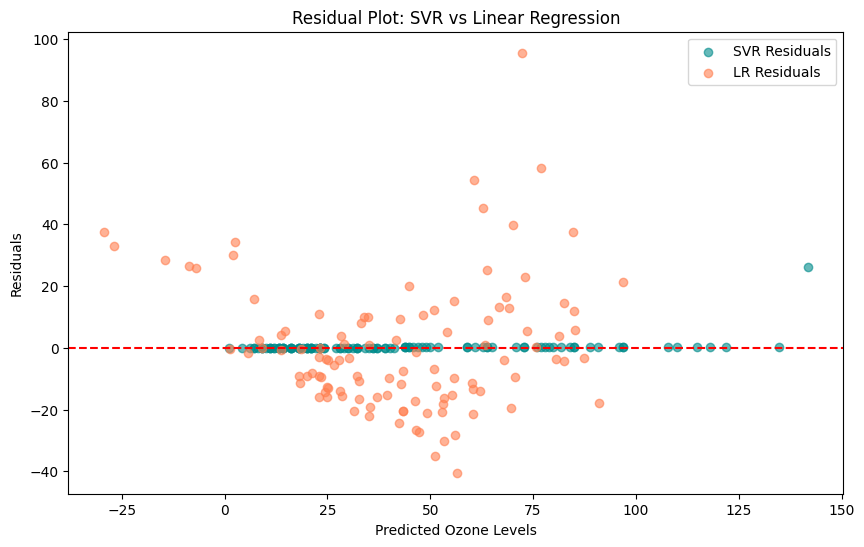

In [71]:
# Residuals for SVR
residuals_svr = y - fitsvr.predict(X)

# Residuals for Linear Regression
residuals_lr = y - fitlr.predict(X)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(fitsvr.predict(X), residuals_svr, alpha=0.6, color='darkcyan', label='SVR Residuals')
plt.scatter(fitlr.predict(X), residuals_lr, alpha=0.6, color='coral', label='LR Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Ozone Levels')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot: SVR vs Linear Regression')
plt.show()

Based on the residual plot for both SVR and Linear Regression, what can you infer about the performance of each model? Which model appears to be more suitable for predicting ozone levels, and why?

In this practical, you've explored regression analysis using real-world environmental data. You've learned how to check model assumptions and refine your approach based on statistical tests. Keep practicing these skills, and consider exploring more advanced modeling techniques as you progress.

## Homework tasks (formative)

Submit your answers on Minerva. You'll receive feedback on how you are doing, which you can use to identify areas you need to focus personal study time on.

1. On Minerva (as part of the homework questions) you will find three residual plots, each demonstrating varying levels of heteroscedasticity. Examine each plot carefully and determine which one, if any, shows signs of heteroscedasticity.

2. Modify the OLS regression model so that it only includes two predictors: Wind and Temp. What is the updated R² value of the model? What does tell you about the variable that was removed (`Solar.R`)?

3. Modify the logistic regression by adjusting the threshold for high ozone levels from 100 to 90 in the binary classification section. What are the updated confusion matrix values?

# Question 2

In [72]:
# Multiple regression to predict Ozone levels
X_reg = airquality[['Wind', 'Temp']] #independent variables
y_reg = airquality['Ozone'] #dependent variable

X_reg = sm.add_constant(X_reg)  # Add a constant for intercept
mult_reg_model = sm.OLS(y_reg, X_reg).fit()

# Print model summary
print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     74.99
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.79e-21
Time:                        10:36:40   Log-Likelihood:                -497.71
No. Observations:                 111   AIC:                             1001.
Df Residuals:                     108   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.3220     23.621     -2.850      0.0

The R-squared value has decreased from 0.606 to 0.581, which tells us that the Solar.R variable was increasing the R-squared value, so this variable is more strongly correlated to Ozone than the other variables.

# Question 3

In [77]:
airquality['Ozone_Level'] = np.where(airquality['Ozone'] > 90, 1, 0)  # Binary variable: 1 = High Pollution, 0 = Low Pollution

X = airquality[['Solar.R', 'Wind', 'Temp']]  # Independent variables
y = airquality['Ozone_Level']  # Dependent variable (binary target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model with the training data
log_reg.fit(X, y)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)

# Lets evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Confusion Matrix:
[[19  2]
 [ 1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.33      0.50      0.40         2

    accuracy                           0.87        23
   macro avg       0.64      0.70      0.66        23
weighted avg       0.90      0.87      0.88        23



##Why do we have references here?!

*As data scientistics, you need to get an understanding of the domain you conducting your analysis in... it might be agricultural, air quality in buildings, biodiversity in surburban gardens, etc. Data science is a tool, and only becomes a powerful and appropiate tool when we have the domain knowledge to make informed decisions, develop hypotheses, and recommendations that are tied to the local context*.

*These papers are entirly optional to read, but are here to get you in the habit of being around literature. They are all good reads, so for those interested, please do go ahead and look at a few. It's all part of you personalising your learning and taking charge.*

## <a name="references"></a>References#

Ekwurzel, B., Boneham, J., Dalton, M.W., Heede, R., Mera, R.J., Allen, M.R. and Frumhoff, P.C., 2017. The rise in global atmospheric CO2, surface temperature, and sea level from emissions traced to major carbon producers. Climatic Change, 144(4), pp.579-590. DOI: [https://doi.org/10.1007/s10584-017-1978-0](https://doi.org/10.1007/s10584-017-1978-0)

Solomon, S., Plattner, G.K., Knutti, R. and Friedlingstein, P., 2009. Irreversible climate change due to carbon dioxide emissions. Proceedings of the national academy of sciences, 106(6), pp.1704-1709. DOI: [https://doi.org/10.1073/pnas.0812721106](https://doi.org/10.1073/pnas.0812721106)

Ran, J., Chao, N., Yue, L., Chen, G., Wang, Z., Wu, T. and Li, C., 2023. Quantifying the contribution of temperature, salinity, and climate change to sea level rise in the Pacific Ocean: 2005-2019. Frontiers in Marine Science, 10, p.1200883. DOI: [https://doi.org/10.3389/fmars.2023.1200883](https://doi.org/10.3389/fmars.2023.1200883)
